# Imersão Dados - Alura

## Aula 2 - Análise exploratória de dados

Continuando as análises iniciadas na **Aula 1**, podemos continuar falando de proporções. Um dos desafios da aula anterior foi determinar a proporções de candidatos por estado e idade, em que calculamos de uma forma bem verbosa.

In [ ]:
import pandas as pd

dados = pd.read_csv('https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true')

Agora vamos usar o Pandas para fazer isso de forma muito mais simples, apenas passando um parâmetro para o método `value_conts()`. Como existem apenas quatro candidatos com 13 anos de idade, vamos fazer um recorte para até 14 anos:

In [ ]:
uf_ate_14 = dados.query('NU_IDADE <= 14')['SG_UF_RESIDENCIA']
uf_ate_14.value_counts(normalize=True)

PE    0.124138
CE    0.103448
BA    0.096552
PA    0.082759
SP    0.075862
MG    0.075862
MA    0.062069
PB    0.048276
PI    0.048276
GO    0.048276
MT    0.027586
DF    0.027586
AM    0.027586
SE    0.020690
TO    0.020690
PR    0.020690
RO    0.013793
SC    0.013793
AL    0.013793
AC    0.006897
RS    0.006897
RJ    0.006897
MS    0.006897
ES    0.006897
RN    0.006897
AP    0.006897
Name: SG_UF_RESIDENCIA, dtype: float64

E plotar gráficos que permitam (_not pizza_) visualizar essa distribuição:

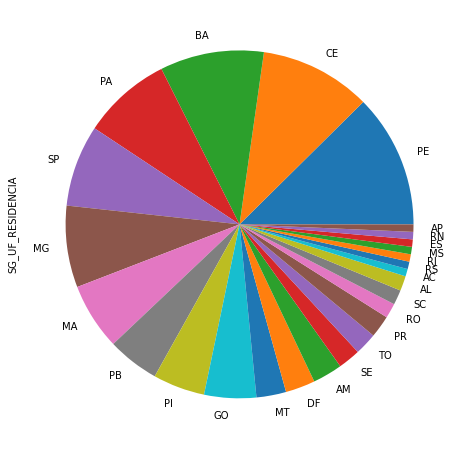

In [ ]:
uf_ate_14.value_counts().plot.pie(figsize=(10, 8))

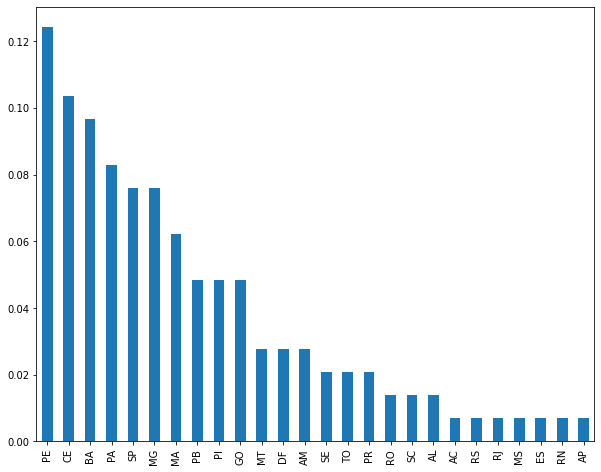

In [ ]:
uf_ate_14.value_counts(normalize=True).plot.bar(figsize=(10, 8))

### Dados socioeconômicos

No ato de inscrição para a prova o candidato deve preencher um questionário socioeconômico. Uma das perguntas é a renda familiar e essa informação está na coluna `Q006`. Os valores possíveis para esta coluna são letras de `A` até `Q` que representam faixas de valores, sendo `A` o menor (nenhum valor no caso) e `Q` o maior.

Vamos começar plotando um gráfico de barras para saber como é a distribuição de candidatos dentro das faixas de renda:

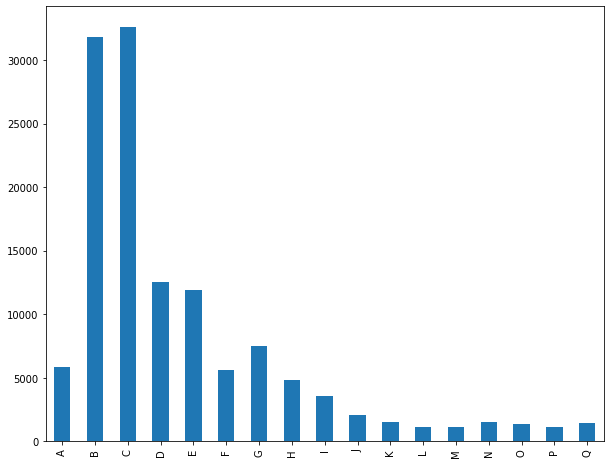

In [ ]:
dados['Q006'].value_counts().sort_index().plot.bar(figsize=(10, 8))

Agora vamos analisar como é a distribuição das notas dentro de cada faixa de renda utilizando representações visuais, e para gerar esses gráficos vamos fazer uso de uma nova biblioteca do Python, a `seaborn`. Além disso vamos usar também a biblioteca `matplotlib` para estilizar os gráficos.

Começamos importando essas duas bibliotecas:

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

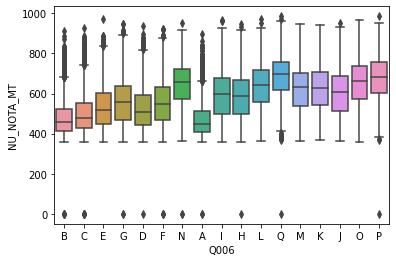

In [ ]:
sns.boxplot(x='Q006', y='NU_NOTA_MT', data=dados)

Vamos modificar esse gráfico para torná-lo mais agradável de olhar. Podemos aumentar o tamanho, definir um título e ordenar as faixas de renda:

In [ ]:
renda_ordenada = dados['Q006'].unique()
renda_ordenada.sort()
renda_ordenada

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q'], dtype=object)

Text(0.5, 1.0, 'Boxplot das Notas de Matemátioca pela Renda')

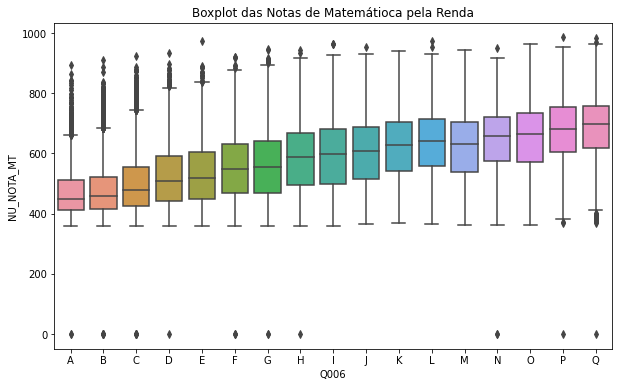

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Q006', y='NU_NOTA_MT', order=renda_ordenada, data=dados)
plt.title('Boxplot das Notas de Matemátioca pela Renda')

O gráfico acima considera apenas a nota de matemática, vamos plotar um que leve em conta a soma de todas as notas:

In [ ]:
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']

# soma todos valores de cada coluna
dados[provas].sum()

NU_NOTA_CN         44334986.1
NU_NOTA_CH         49743676.1
NU_NOTA_MT         48563933.8
NU_NOTA_LC         51027844.9
NU_NOTA_REDACAO    56038440.0
dtype: float64

In [ ]:
# soma as notas de cada linha
nota_total = dados[provas].sum(axis=1)
nota_total

0         2288.9
1         1184.6
2         2350.5
3         2555.7
4         2803.5
           ...  
127375    2867.4
127376    2218.5
127377    1453.9
127378    2573.9
127379    2287.8
Length: 127380, dtype: float64

Agora que temos uma série do Pandas com as "notas totais", podemos adicioná-la como uma nova coluna ao _DataFrame_ e plotar o gráfico para a nota total. Mas antes disso vamos abstrair o código responsável por plotar um gráfico do tipo _boxplot_ para uma função Python:

In [ ]:
dados['NU_NOTA_TOTAL'] = nota_total

In [ ]:
def plota_boxplot_renda_por_nota(data_set, coluna_nota, titulo_grafico, tamanho=None, info_adicional=None):
    renda_ordenada = data_set['Q006'].unique()
    renda_ordenada.sort()
    
    plt.figure(figsize= (10,6) if tamanho == None else tamanho)
    sns.boxplot(x='Q006', y=coluna_nota, order=renda_ordenada, data=data_set, hue=info_adicional)
    plt.title(titulo_grafico)

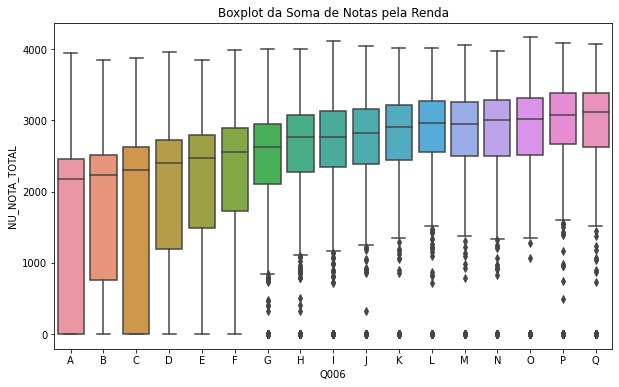

In [ ]:
plota_boxplot_renda_por_nota(dados, 'NU_NOTA_TOTAL', 'Boxplot da Soma de Notas pela Renda')

Um informação interessante que podemos notar é que nas faixas de menor renda as notas baixas fazem parte da concentração de notas, enquanto que nas faixas de maior renda a situação é um pouco diferente. O _range_ da concentração de notas é menor e apesar de existirem notas baixas estas são _outliers_.

Podemos plotar um histograma para a "nota total" para nos ajudar a entender a distribuição acima. E vamos utilizar a biblioteca `seaborn`, já que começamos a utilizá-la a pouco:

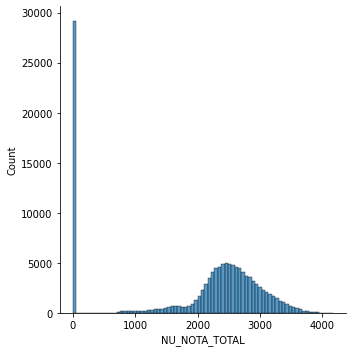

In [ ]:
sns.displot(dados, x='NU_NOTA_TOTAL')

Perceba que a nota zero é a **moda** das notas, ou seja, é a nota mais comum. Então vamos analisar apenas os candidatos que tiveram nota zero:

In [ ]:
provas.append('NU_NOTA_TOTAL')
dados.query('NU_NOTA_TOTAL == 0')[provas]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
10,NaN,NaN,NaN,NaN,NaN,0.0
11,NaN,NaN,NaN,NaN,NaN,0.0
26,NaN,NaN,NaN,NaN,NaN,0.0
38,NaN,NaN,NaN,NaN,NaN,0.0
40,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...
127351,NaN,NaN,NaN,NaN,NaN,0.0
127365,NaN,NaN,NaN,NaN,NaN,0.0
127366,NaN,NaN,NaN,NaN,NaN,0.0
127368,NaN,NaN,NaN,NaN,NaN,0.0


Apesar de a saída do comando ser bastante limitada, vemos que todos as linhas que são apresentadas trazem o valor `NaN` (_not a number_). Então vamos filtrar apenas os candidatos que fizeram a prova e não foram eliminados. Vamos aproveitar e ver suas idades e de onde são:

In [ ]:
provas_zeradas = dados.query('NU_NOTA_TOTAL == 0')
candidatos_presentes = provas_zeradas.query('TP_PRESENCA_CN == 1 and TP_PRESENCA_CH == 1 and TP_PRESENCA_LC == 1 and TP_PRESENCA_MT == 1')

colunas_interesse = provas[:]
colunas_interesse.append('NU_IDADE')
colunas_interesse.append('SG_UF_RESIDENCIA')

candidatos_presentes[colunas_interesse]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL,NU_IDADE,SG_UF_RESIDENCIA
8693,0.0,0.0,0.0,0.0,0.0,0.0,44,PE
101269,0.0,0.0,0.0,0.0,0.0,0.0,24,PI


Vamos fazer o mesmo com os candidatos que foram eliminados. Como não sei se quando um candidato é eliminado sua "nota total" passa a ser zero automáticamente, vamos adicionar as colunas de que indicam a presença no _DataSet_ impresso na tela:

In [ ]:
candidatos_eliminados = dados.query('TP_PRESENCA_CN == 2 or TP_PRESENCA_CH == 2 or TP_PRESENCA_LC == 2 or TP_PRESENCA_MT == 2')

colunas_interesse.extend(['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT'])

candidatos_eliminados[colunas_interesse]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL,NU_IDADE,SG_UF_RESIDENCIA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT
77,NaN,NaN,NaN,NaN,NaN,0.0,22,PA,0,2,2,0
396,NaN,NaN,NaN,NaN,NaN,0.0,17,PA,0,2,2,0
446,NaN,NaN,NaN,NaN,NaN,0.0,35,PA,0,2,2,0
609,NaN,NaN,NaN,NaN,NaN,0.0,32,RO,0,2,2,0
728,NaN,NaN,NaN,NaN,NaN,0.0,18,AM,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
125216,NaN,NaN,NaN,NaN,NaN,0.0,19,SP,0,2,2,0
125503,NaN,472.4,NaN,476.8,520.0,1469.2,42,GO,2,1,1,2
125784,NaN,NaN,NaN,NaN,NaN,0.0,21,MT,0,2,2,0
126769,NaN,NaN,NaN,NaN,NaN,0.0,50,DF,0,2,2,0


In [ ]:
len(candidatos_eliminados[colunas_interesse].query('NU_NOTA_TOTAL != 0'))

58

Vamos remover as linhas do _DataSet_ principal referentes aos alunos que tiveram "notal total" igual a zero. E pelos recortes que fizemos acima, já sabemos que vamos tirar dois candidatos que participaram de todos os dias de prova e vamos manter alguns que foram eliminados.

In [ ]:
dados_sem_nota_zero = dados.query('NU_NOTA_TOTAL != 0')
dados_sem_nota_zero[provas].head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
0,435.6,512.3,432.4,488.6,420.0,2288.9
1,NaN,409.3,NaN,375.3,400.0,1184.6
2,423.2,499.1,427.2,441.0,560.0,2350.5
3,426.2,578.1,499.9,551.5,500.0,2555.7
4,516.5,571.3,424.5,511.2,780.0,2803.5


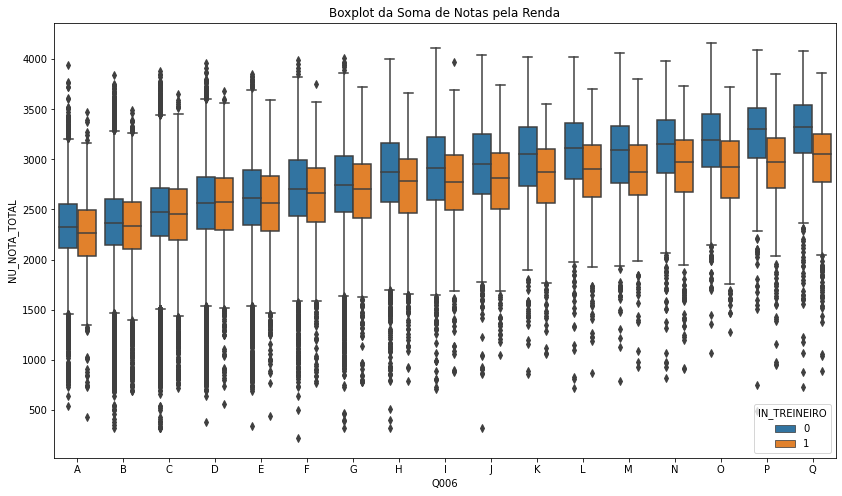

In [ ]:
plota_boxplot_renda_por_nota(dados_sem_nota_zero, 'NU_NOTA_TOTAL', 'Boxplot da Soma de Notas pela Renda', (14, 8), 'IN_TREINEIRO')

In [ ]:
# 1) expandir a amostra de candidatos menores de idade
# 2) avaliar o local de residencia e aplicação da prova para pessoas que faltaram ao menos um dia
# 3) avaliar as proporcoes entre treineiros e não treineiros de acordo com a faixa de renda
# 4) fazer um boxplot da nota total e questão 25